In [50]:
import math
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.cross_validation import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor# for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.decomposition import PCA
import os
from scipy import ndimage
import tensorflow as tf
import matplotlib.pyplot as plt
np.random.seed(1)


# Any results you write to the current directory are saved as output.

In [3]:
train_data = pd.read_csv("yds_train2018.csv")

In [4]:
train_data.shape

(79072, 8)

In [5]:
train_data.head(5)

,S_No,Year,Month,Week,Merchant_ID,Product_ID,Country,Sales
0,1,2013,1,1,ar00001,1,Argentina,157500.0
1,2,2013,1,1,ar00003,1,Argentina,39375.0
2,3,2013,1,1,ar00004,1,Argentina,15750.0
3,4,2013,1,1,ar00007,1,Argentina,47250.0
4,5,2013,1,1,ar00008,1,Argentina,283500.0


In [6]:
test_data = pd.read_csv("yds_test2018.csv")

In [7]:
test_data.shape

(105, 6)

In [8]:
test_data.describe

<bound method NDFrame.describe of       S_No  Year  Month  Product_ID    Country  Sales
0    79073  2016      4           1  Argentina    NaN
1    79074  2016      5           1  Argentina    NaN
2    79075  2016      6           1  Argentina    NaN
3    79076  2016      7           1  Argentina    NaN
4    79077  2016      8           1  Argentina    NaN
5    79078  2016      9           1  Argentina    NaN
6    79079  2016     10           1  Argentina    NaN
7    79080  2016     11           1  Argentina    NaN
8    79081  2016     12           1  Argentina    NaN
9    79082  2017      1           1  Argentina    NaN
10   79083  2017      2           1  Argentina    NaN
11   79084  2017      3           1  Argentina    NaN
12   79085  2016      4           2  Argentina    NaN
13   79086  2016      5           2  Argentina    NaN
14   79087  2016      6           2  Argentina    NaN
15   79088  2016      7           2  Argentina    NaN
16   79089  2016      8           2  Argentina  

In [9]:
train_data.isnull().any()

S_No           False
Year           False
Month          False
Week           False
Merchant_ID    False
Product_ID     False
Country        False
Sales          False
dtype: bool

In [10]:
test_data.isnull().any()

S_No          False
Year          False
Month         False
Product_ID    False
Country       False
Sales          True
dtype: bool

In [11]:
train_data.describe()

,S_No,Year,Month,Week,Product_ID,Sales
count,79072.00000,79072.000000,79072.000000,79072.000000,79072.000000,7.907200e+04
mean,39536.50000,2014.223935,6.282439,25.614086,2.168151,1.049678e+05
std,22826.26458,0.979109,3.477648,15.160151,1.136387,7.642310e+05
min,1.00000,2013.000000,1.000000,1.000000,1.000000,-2.406069e+06
25%,19768.75000,2013.000000,3.000000,12.000000,1.000000,9.524500e+02
50%,39536.50000,2014.000000,6.000000,25.000000,2.000000,6.400000e+03
75%,59304.25000,2015.000000,9.000000,39.000000,2.000000,2.418520e+04
max,79072.00000,2016.000000,12.000000,53.000000,5.000000,3.487431e+07


In [12]:
test_data.describe()

,S_No,Year,Month,Product_ID,Sales
count,105.000000,105.000000,105.000000,105.000000,0.0
mean,79125.000000,2016.171429,6.028571,2.428571,NaN
std,30.454885,0.508715,3.571945,1.254662,NaN
min,79073.000000,2015.000000,1.000000,1.000000,NaN
25%,79099.000000,2016.000000,3.000000,2.000000,NaN
50%,79125.000000,2016.000000,6.000000,2.000000,NaN
75%,79151.000000,2016.000000,9.000000,4.000000,NaN
max,79177.000000,2017.000000,12.000000,5.000000,NaN


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79072 entries, 0 to 79071
Data columns (total 8 columns):
S_No           79072 non-null int64
Year           79072 non-null int64
Month          79072 non-null int64
Week           79072 non-null int64
Merchant_ID    79072 non-null object
Product_ID     79072 non-null int64
Country        79072 non-null object
Sales          79072 non-null float64
dtypes: float64(1), int64(5), object(2)
memory usage: 4.8+ MB


In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
S_No          105 non-null int64
Year          105 non-null int64
Month         105 non-null int64
Product_ID    105 non-null int64
Country       105 non-null object
Sales         0 non-null float64
dtypes: float64(1), int64(4), object(1)
memory usage: 5.0+ KB


count    7.907200e+04
mean     1.049678e+05
std      7.642310e+05
min     -2.406069e+06
25%      9.524500e+02
50%      6.400000e+03
75%      2.418520e+04
max      3.487431e+07
Name: Sales, dtype: float64

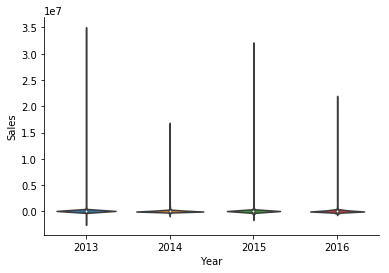

In [15]:
sns.violinplot(train_data['Year'], train_data['Sales']) #Variable Plot
sns.despine()
train_data['Sales'].describe()

c:\users\naimish\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


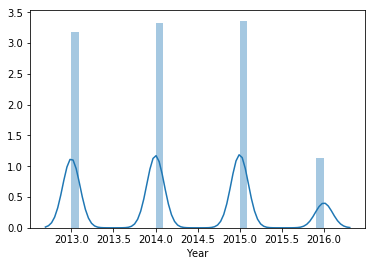

In [16]:
sns.distplot(train_data['Year']);

c:\users\naimish\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


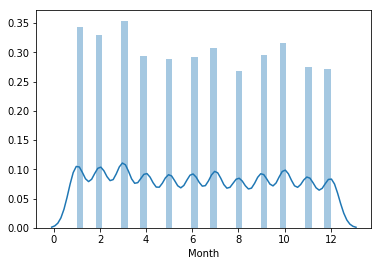

In [17]:
sns.distplot(train_data['Month']);

c:\users\naimish\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


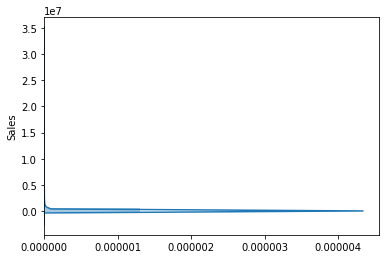

In [18]:
sns.distplot(train_data['Sales'],vertical = True);

c:\users\naimish\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


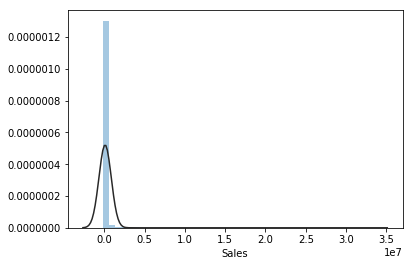

In [19]:
from scipy.stats import norm
sns.distplot(train_data['Sales'],fit=norm,kde=False);

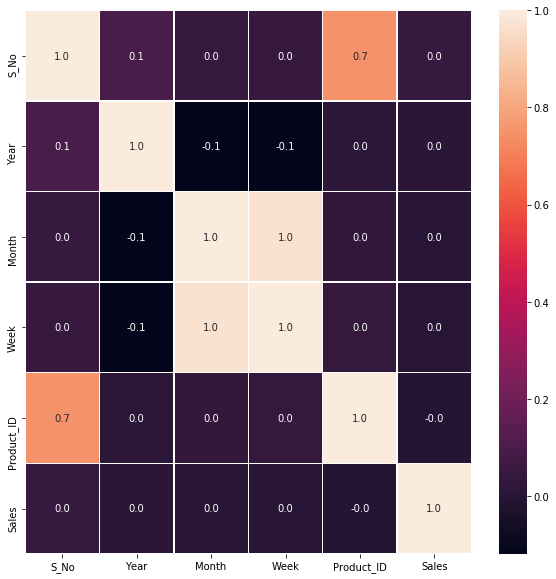

In [20]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(train_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [21]:
train_data[['Country','Sales']].groupby('Country').count()

,Sales
Country,
Argentina,10370
Belgium,1891
Columbia,38270
Denmark,14452
England,5764
Finland,8325


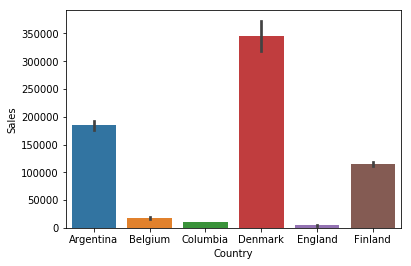

In [22]:
sns.barplot(train_data['Country'],train_data['Sales']);

In [23]:
train_data.groupby('Country').count()

,S_No,Year,Month,Week,Merchant_ID,Product_ID,Sales
Country,,,,,,,
Argentina,10370,10370,10370,10370,10370,10370,10370
Belgium,1891,1891,1891,1891,1891,1891,1891
Columbia,38270,38270,38270,38270,38270,38270,38270
Denmark,14452,14452,14452,14452,14452,14452,14452
England,5764,5764,5764,5764,5764,5764,5764
Finland,8325,8325,8325,8325,8325,8325,8325


In [24]:
#sns.barplot(train_data['Merchant_ID'],train_data['Sales']);

In [25]:
train_data.head(6)

,S_No,Year,Month,Week,Merchant_ID,Product_ID,Country,Sales
0,1,2013,1,1,ar00001,1,Argentina,157500.0
1,2,2013,1,1,ar00003,1,Argentina,39375.0
2,3,2013,1,1,ar00004,1,Argentina,15750.0
3,4,2013,1,1,ar00007,1,Argentina,47250.0
4,5,2013,1,1,ar00008,1,Argentina,283500.0
5,6,2013,1,1,ar000011,1,Argentina,0.0


In [26]:
train_data.drop('Merchant_ID',axis=1,inplace=True)
#train_data = pd.get_dummies(train_data)

In [27]:
train_data.head(10)

,S_No,Year,Month,Week,Product_ID,Country,Sales
0,1,2013,1,1,1,Argentina,157500.0
1,2,2013,1,1,1,Argentina,39375.0
2,3,2013,1,1,1,Argentina,15750.0
3,4,2013,1,1,1,Argentina,47250.0
4,5,2013,1,1,1,Argentina,283500.0
5,6,2013,1,1,1,Argentina,0.0
6,7,2013,1,1,1,Argentina,1575.0
7,8,2013,1,1,1,Argentina,47250.0
8,9,2013,1,1,1,Argentina,0.0
9,10,2013,1,1,1,Argentina,0.0


In [28]:
train_data.drop('S_No',axis=1,inplace=True)
train_data

,Year,Month,Week,Product_ID,Country,Sales
0,2013,1,1,1,Argentina,157500.00
1,2013,1,1,1,Argentina,39375.00
2,2013,1,1,1,Argentina,15750.00
3,2013,1,1,1,Argentina,47250.00
4,2013,1,1,1,Argentina,283500.00
5,2013,1,1,1,Argentina,0.00
6,2013,1,1,1,Argentina,1575.00
7,2013,1,1,1,Argentina,47250.00
8,2013,1,1,1,Argentina,0.00
9,2013,1,1,1,Argentina,0.00


In [29]:
test_data.head()

,S_No,Year,Month,Product_ID,Country,Sales
0,79073,2016,4,1,Argentina,NaN
1,79074,2016,5,1,Argentina,NaN
2,79075,2016,6,1,Argentina,NaN
3,79076,2016,7,1,Argentina,NaN
4,79077,2016,8,1,Argentina,NaN


In [30]:
dummy_test_data = test_data
dummy_test_data.head(5)

,S_No,Year,Month,Product_ID,Country,Sales
0,79073,2016,4,1,Argentina,NaN
1,79074,2016,5,1,Argentina,NaN
2,79075,2016,6,1,Argentina,NaN
3,79076,2016,7,1,Argentina,NaN
4,79077,2016,8,1,Argentina,NaN


In [110]:
#test_data = pd.get_dummies(test_data)

In [89]:
#test_data.drop('Sales',axis=1,inplace=True)

In [111]:
#test_data.drop('S_No',axis=1,inplace=True)
#test_data

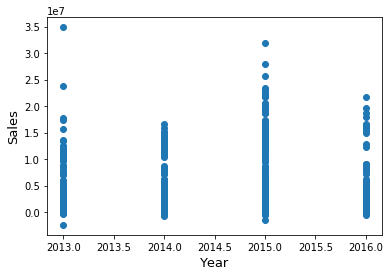

In [31]:
fig, ax = plt.subplots()
ax.scatter(x = train_data['Year'], y = train_data['Sales'])
plt.ylabel('Sales', fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.show()

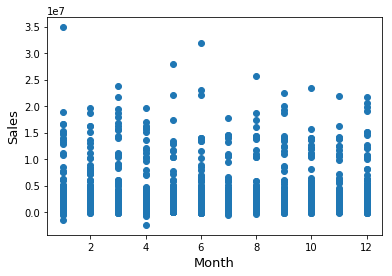

In [32]:
fig, ax = plt.subplots()
ax.scatter(x = train_data['Month'], y = train_data['Sales'])
plt.ylabel('Sales', fontsize=13)
plt.xlabel('Month', fontsize=13)
plt.show()

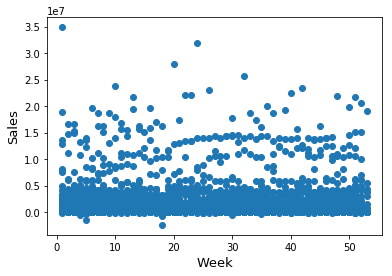

In [33]:
fig, ax = plt.subplots()
ax.scatter(x = train_data['Week'], y = train_data['Sales'])
plt.ylabel('Sales', fontsize=13)
plt.xlabel('Week', fontsize=13)
plt.show()

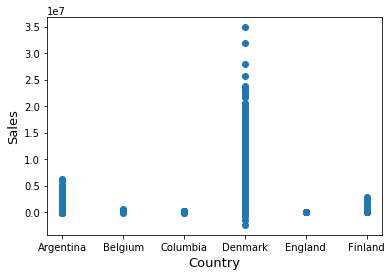

In [34]:
fig, ax = plt.subplots()
ax.scatter(x = train_data['Country'], y = train_data['Sales'])
plt.ylabel('Sales', fontsize=13)
plt.xlabel('Country', fontsize=13)
plt.show()

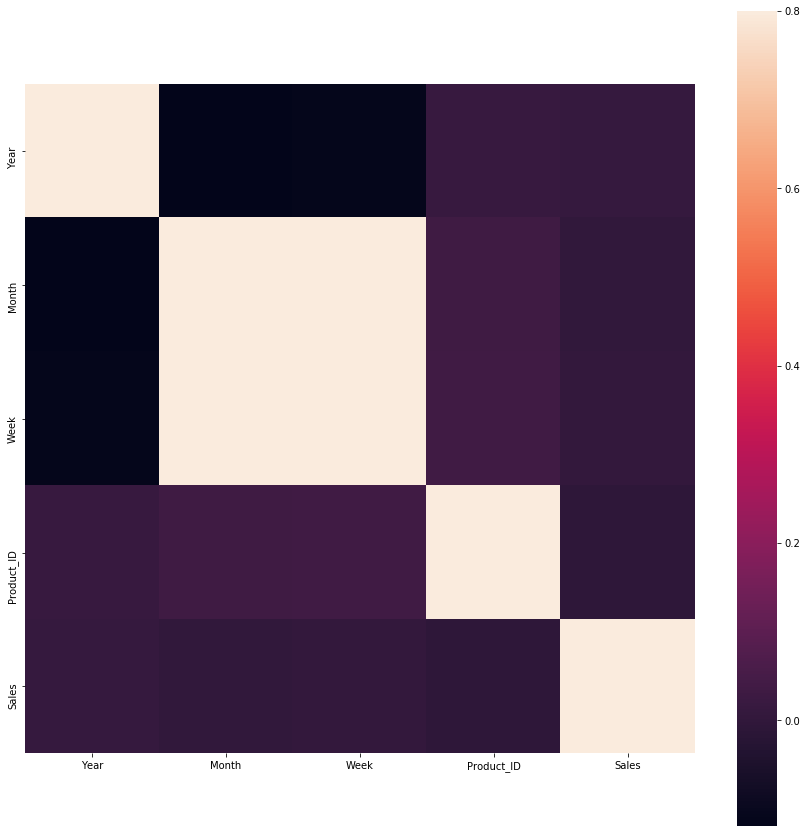

In [35]:
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax=.8, square=True);

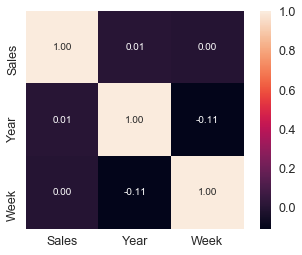

In [36]:
k = 3 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Sales')['Sales'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

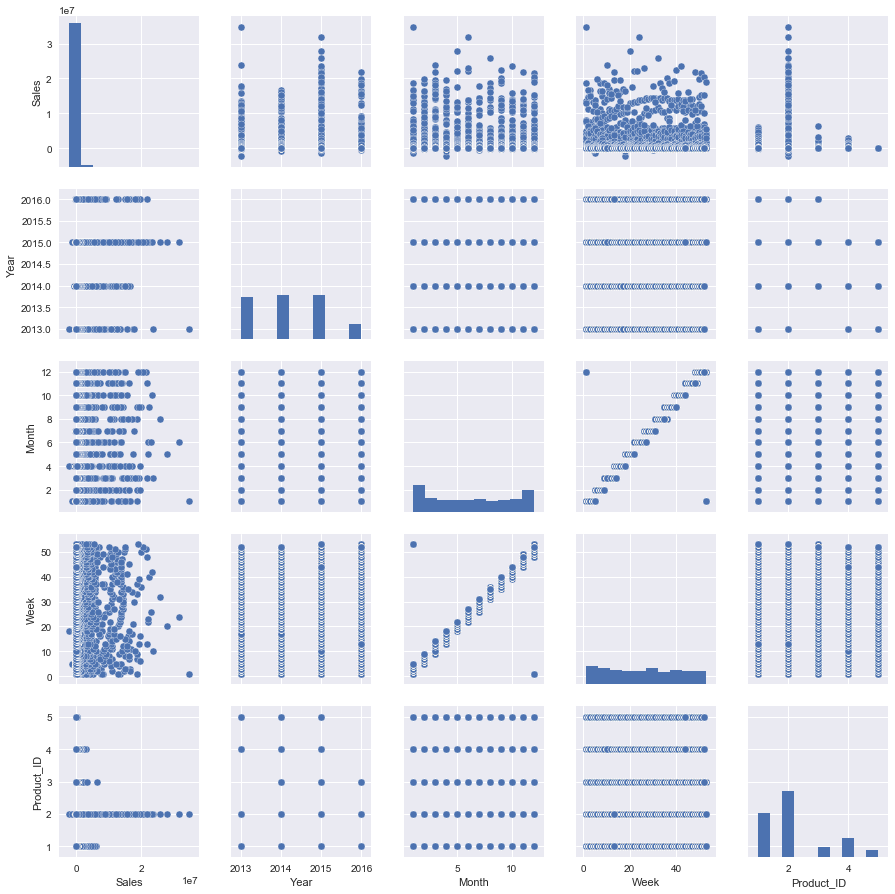

In [37]:
sns.set()
cols = ['Sales', 'Year', 'Month', 'Week', 'Product_ID', 'Country']
sns.pairplot(train_data[cols], size = 2.5)
plt.show();

c:\users\naimish\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


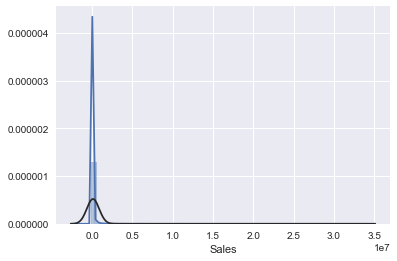

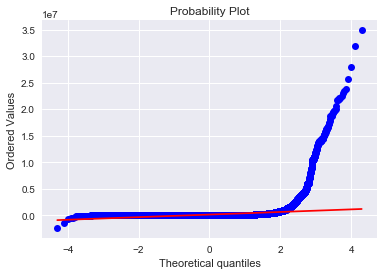

In [38]:
sns.distplot(train_data['Sales'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['Sales'], plot=plt)

In [ ]:
'''train_data['HasBsmt'] = pd.Series(len(train_data['Sales']), index=train_data.index)
train_data['HasBsmt'] = 0 
train_data.loc[train_data['Sales']>0,'HasBsmt'] = 1'''

In [ ]:
#train_data.loc[train_data['HasBsmt']==1,'Sales'] = np.log(train_data['Sales'])

In [ ]:
'''sns.distplot(train_data[train_data['Sales']>0]['Sales'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data[train_data['Sales']>0]['Sales'], plot=plt)'''

In [39]:
'''d = {'Sales':train_data['Sales']}
train_y = pd.DataFrame(data=d)
train_x = train_data.drop('Sales',axis=1)
train_x.head(5)'''

"d = {'Sales':train_data['Sales']}\ntrain_y = pd.DataFrame(data=d)\ntrain_x = train_data.drop('Sales',axis=1)\ntrain_x.head(5)"

In [42]:
temp = train_data[['Country','Year','Month','Product_ID','Sales']].groupby(['Country','Year','Month','Product_ID'], as_index=False).sum()

In [43]:
temp.info()
temp

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 387
Data columns (total 5 columns):
Country       388 non-null object
Year          388 non-null int64
Month         388 non-null int64
Product_ID    388 non-null int64
Sales         388 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 18.2+ KB


,Country,Year,Month,Product_ID,Sales
0,Argentina,2013,1,1,34346025.00
1,Argentina,2013,1,2,2751851.48
2,Argentina,2013,2,1,32005575.00
3,Argentina,2013,2,2,2804313.12
4,Argentina,2013,3,1,32530050.00
5,Argentina,2013,3,2,2573004.98
6,Argentina,2013,4,1,35588700.00
7,Argentina,2013,4,2,3436237.42
8,Argentina,2013,5,1,38789100.00
9,Argentina,2013,5,2,3772468.84


In [44]:
argentina_train = temp.loc[temp['Country']=='Argentina']
denmark_train = temp.loc[temp['Country']=='Denmark']
belgium_train = temp.loc[temp['Country']=='Belgium']
england_train = temp.loc[temp['Country']=='England']
columbia_train = temp.loc[temp['Country']=='Columbia']
finland_train = temp.loc[temp['Country']=='Finland']

In [45]:
model = LinearRegression()
model.fit(argentina_train.drop(['Country','Sales'], axis=1),argentina_train['Sales'])
acc = model.score(argentina_train.drop(['Country','Sales'], axis=1),argentina_train['Sales'])
print(100*acc,'%')

41.57843621606922 %


In [46]:
model = LinearRegression()
model.fit(denmark_train.drop(['Country','Sales'], axis=1),denmark_train['Sales'])
acc = model.score(denmark_train.drop(['Country','Sales'], axis=1),denmark_train['Sales'])
print(100*acc,'%')

73.85064919858564 %


In [47]:
model = Lasso()
model.fit(denmark_train.drop(['Country','Sales'], axis=1),denmark_train['Sales'])
acc = model.score(denmark_train.drop(['Country','Sales'], axis=1),denmark_train['Sales'])
print(100*acc,'%')

73.85064919858489 %


In [51]:
denmark_model = RandomForestRegressor()
denmark_model.fit(denmark_train.drop(['Country','Sales'], axis=1),denmark_train['Sales'])
acc = denmark_model.score(denmark_train.drop(['Country','Sales'], axis=1),denmark_train['Sales'])
print(100*acc,'%')

94.61370615466213 %


In [52]:
argentina_model = RandomForestRegressor()
argentina_model.fit(argentina_train.drop(['Country','Sales'], axis=1),argentina_train['Sales'])
acc = argentina_model.score(argentina_train.drop(['Country','Sales'], axis=1),argentina_train['Sales'])
print(100*acc,'%')

98.82329983933636 %


In [53]:
england_model = RandomForestRegressor()
england_model.fit(england_train.drop(['Country','Sales'], axis=1),england_train['Sales'])
acc = england_model.score(england_train.drop(['Country','Sales'], axis=1),england_train['Sales'])
print(100*acc,'%')

98.83031897551395 %


In [54]:
belgium_model = RandomForestRegressor()
belgium_model.fit(belgium_train.drop(['Country','Sales'], axis=1),belgium_train['Sales'])
acc = belgium_model.score(belgium_train.drop(['Country','Sales'], axis=1),belgium_train['Sales'])
print(100*acc,'%')

93.85366895088653 %


In [55]:
columbia_model = RandomForestRegressor()
columbia_model.fit(columbia_train.drop(['Country','Sales'], axis=1),columbia_train['Sales'])
acc = columbia_model.score(columbia_train.drop(['Country','Sales'], axis=1),columbia_train['Sales'])
print(100*acc,'%')

99.23073498986932 %


In [79]:
finland_model = RandomForestRegressor()
finland_model.fit(finland_train.drop(['Country','Sales'], axis=1),finland_train['Sales'])
acc = finland_model.score(finland_train.drop(['Country','Sales'], axis=1),finland_train['Sales'])
print(100*acc,'%')

81.62070211731988 %


In [80]:
models = {'England':england_model, 'Argentina':argentina_model, 'Belgium':belgium_model, 'Finland':finland_model, 'Columbia':columbia_model, 'Denmark':denmark_model}

In [81]:
test_data = pd.read_csv('...\\zs\\dataset\\yds_test2018.csv')
expense_data = pd.read_csv('...\\zs\\dataset\\promotional_expense.csv')

In [83]:
argentina_expense = expense_data.loc[expense_data['Country']=='Argentina']
denmark_expense = expense_data.loc[expense_data['Country']=='Denmark']
belgium_expense = expense_data.loc[expense_data['Country']=='Belgium']
england_expense = expense_data.loc[expense_data['Country']=='England']
columbia_expense = expense_data.loc[expense_data['Country']=='Columbia']
finland_expense = expense_data.loc[expense_data['Country']=='Finland']

In [84]:
argentina_expense_model = RandomForestRegressor()
argentina_expense_model.fit(argentina_expense.drop(['Country','Expense_Price'], axis=1),argentina_expense['Expense_Price'])
acc = argentina_expense_model.score(argentina_expense.drop(['Country','Expense_Price'], axis=1),argentina_expense['Expense_Price'])
print(100*acc,'%')

98.69693864838833 %


In [85]:
england_expense_model = RandomForestRegressor()
england_expense_model.fit(england_expense.drop(['Country','Expense_Price'], axis=1),england_expense['Expense_Price'])
acc = england_expense_model.score(england_expense.drop(['Country','Expense_Price'], axis=1),england_expense['Expense_Price'])
print(100*acc,'%')

98.81665007744658 %


In [86]:
finland_expense_model = RandomForestRegressor()
finland_expense_model.fit(finland_expense.drop(['Country','Expense_Price'], axis=1),finland_expense['Expense_Price'])
acc = finland_expense_model.score(finland_expense.drop(['Country','Expense_Price'], axis=1),finland_expense['Expense_Price'])
print(100*acc,'%')

85.00871438715907 %


In [87]:
columbia_expense_model = RandomForestRegressor()
columbia_expense_model.fit(columbia_expense.drop(['Country','Expense_Price'], axis=1),columbia_expense['Expense_Price'])
acc = columbia_expense_model.score(columbia_expense.drop(['Country','Expense_Price'], axis=1),columbia_expense['Expense_Price'])
print(100*acc,'%')

98.66020007342506 %


In [88]:
belgium_expense_model = RandomForestRegressor()
belgium_expense_model.fit(belgium_expense.drop(['Country','Expense_Price'], axis=1),belgium_expense['Expense_Price'])
acc = belgium_expense_model.score(belgium_expense.drop(['Country','Expense_Price'], axis=1),belgium_expense['Expense_Price'])
print(100*acc,'%')

95.57250868093223 %


In [89]:
denmark_expense_model = RandomForestRegressor()
denmark_expense_model.fit(denmark_expense.drop(['Country','Expense_Price'], axis=1),denmark_expense['Expense_Price'])
acc = denmark_expense_model.score(denmark_expense.drop(['Country','Expense_Price'], axis=1),denmark_expense['Expense_Price'])
print(100*acc,'%')

92.77128958523431 %


In [90]:
expense_models = {'England':england_expense_model, 'Argentina':argentina_expense_model, 'Belgium':belgium_expense_model, 'Finland':finland_expense_model, 'Columbia':columbia_expense_model, 'Denmark':denmark_expense_model}

In [103]:
prediction = []
for index,row in test_data.iterrows():
    predicted_sales = models[row['Country']].predict([[row['Year'], row['Month'], row['Product_ID']]])
    predicted_expense = expense_models[row['Country']].predict([[row['Year'], row['Month'], row['Product_ID']]])
    predicted_sales -= predicted_expense - 500
    prediction.append("%.9f"%predicted_sales[0])

In [104]:
submission = pd.DataFrame({
        'S_No':test_data['S_No'],
        'Year':test_data['Year'],
        'Month':test_data['Month'],
        'Product_ID':test_data['Product_ID'],
        'Country':test_data['Country'],
        'Sales': prediction
    },columns=['S_No','Year','Month','Product_ID','Country','Sales'])
submission.to_csv('...\\zs\\dataset\\sample_submission.csv', index=False)

In [ ]:
'''model = LinearRegression()
model.fit(train_x,train_y)
prediction=model.predict(test_data)
print(train_y.shape)
print(prediction.shape)
acc = model.score(train_x,train_y)
print(acc*100,'%')'''

In [ ]:
'''clf = Lasso(alpha=0.00001)
clf.fit(train_x,train_y)
prediction=clf.predict(test_data)
acc = clf.score(train_x,train_y)
print(acc*100,'%')'''

In [ ]:
'''clf = Ridge(alpha=2.0)
clf.fit(train_x,train_y)
prediction=clf.predict(test_data)
acc = clf.score(train_x,train_y)
print(acc*100,'%')'''

In [ ]:
'''clf = DecisionTreeRegressor()
clf.fit(train_x,train_y)
prediction = clf.predict(test_data)
acc = clf.score(train_x,train_y)
print(acc*100,'%')'''

In [ ]:
'''rng = np.random.RandomState(1)
clf = AdaBoostRegressor(DecisionTreeRegressor(),n_estimators=300, random_state=rng)
clf.fit(train_x,train_y)
prediction = clf.predict(test_data)
acc = clf.score(train_x,train_y)
print(acc*100,'%')'''

In [ ]:
'''train_y = (train_y - train_y.mean()) / (train_y.max()+1)
from keras.models import Sequential
model = Sequential()
from keras.layers import Dense

model.add(Dense(units=10, activation='relu', input_dim=5))
model.add(Dense(units=1, activation='relu'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam')
model.fit(train_x, train_y, epochs=5, batch_size=32)
prediction = model.predict(test_data, batch_size=128)'''

In [ ]:
#print(prediction)
#df = {"Sales":prediction.flatten()}
#yd = pd.DataFrame(data=df,dtype=np.int32)

In [ ]:
#new_test = pd.read_csv("C:\\Users\\Naimish\\Desktop\\ooo\\zs\\dataset\\yds_test2018.csv")

In [ ]:
'''submission = pd.DataFrame({
        'S_No':new_test['S_No'],
        'Year':new_test['Year'],
        'Month':new_test['Month'],
        'Product_ID':new_test['Product_ID'],
        'Country':new_test['Country'],
        'Sales': prediction.flatten()
    },columns=['S_No','Year','Month','Product_ID','Country','Sales'])
submission.to_csv('....\\zs\\dataset\\sample_submission.csv', index=False)'''